In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('NIFTY_50.csv', na_values='-')

print(df.head())


  Index Name         Date      Open      High       Low     Close
0   NIFTY 50  11 Oct 2024  24985.30  25028.65  24920.05  24964.25
1   NIFTY 50  10 Oct 2024  25067.05  25134.05  24979.40  24998.45
2   NIFTY 50  09 Oct 2024  25065.80  25234.05  24947.70  24981.95
3   NIFTY 50  08 Oct 2024  24832.20  25044.00  24756.80  25013.15
4   NIFTY 50  07 Oct 2024  25084.10  25143.00  24694.35  24795.75


In [2]:
print(df.tail())

     Index Name         Date  Open  High  Low   Close
8320   NIFTY 50  10 Jul 1990   NaN   NaN  NaN  288.69
8321   NIFTY 50  09 Jul 1990   NaN   NaN  NaN  289.69
8322   NIFTY 50  06 Jul 1990   NaN   NaN  NaN  289.04
8323   NIFTY 50  05 Jul 1990   NaN   NaN  NaN  284.04
8324   NIFTY 50  03 Jul 1990   NaN   NaN  NaN  279.02


In [3]:
df_cleaned = df.dropna(subset=['Open', 'High', 'Low'])

In [4]:
df_cleaned.to_csv('nifty50_cleaned.csv', index=False)

In [5]:
removed_rows = len(df) - len(df_cleaned)
print(f"Removed rows with missing Open/High/Low: {removed_rows}")

Removed rows with missing Open/High/Low: 1125


In [6]:
print(df_cleaned.head())

  Index Name         Date      Open      High       Low     Close
0   NIFTY 50  11 Oct 2024  24985.30  25028.65  24920.05  24964.25
1   NIFTY 50  10 Oct 2024  25067.05  25134.05  24979.40  24998.45
2   NIFTY 50  09 Oct 2024  25065.80  25234.05  24947.70  24981.95
3   NIFTY 50  08 Oct 2024  24832.20  25044.00  24756.80  25013.15
4   NIFTY 50  07 Oct 2024  25084.10  25143.00  24694.35  24795.75


In [7]:
print(df_cleaned.tail())

     Index Name         Date     Open     High     Low    Close
7196   NIFTY 50  09 Nov 1995   960.32   960.32  952.13   953.07
7197   NIFTY 50  08 Nov 1995   976.28   976.28  962.98   964.01
7198   NIFTY 50  07 Nov 1995   987.17   987.17  977.05   978.22
7199   NIFTY 50  06 Nov 1995  1001.53  1001.53  988.92   988.92
7200   NIFTY 50  03 Nov 1995   994.20  1000.91  992.69  1000.00


In [8]:
#Date column को datetime format में बदलें
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Open, High, Low, Close convert into numeric to float
numeric_columns = ['Open', 'High', 'Low', 'Close']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# rmove extra white space
df.columns = df.columns.str.strip()

df['Year'] = df['Date'].dt.year

print(df.dtypes)
print(df.head())

Index Name            object
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Year                   int32
dtype: object
  Index Name       Date      Open      High       Low     Close  Year
0   NIFTY 50 2024-10-11  24985.30  25028.65  24920.05  24964.25  2024
1   NIFTY 50 2024-10-10  25067.05  25134.05  24979.40  24998.45  2024
2   NIFTY 50 2024-10-09  25065.80  25234.05  24947.70  24981.95  2024
3   NIFTY 50 2024-10-08  24832.20  25044.00  24756.80  25013.15  2024
4   NIFTY 50 2024-10-07  25084.10  25143.00  24694.35  24795.75  2024


In [9]:
# Yearly average Close Price
annual_trend = df.groupby('Year')['Close'].mean().reset_index()
print(annual_trend)


    Year         Close
0   1990    372.290227
1   1991    449.195874
2   1992    836.655789
3   1993    755.601596
4   1994   1245.978261
5   1995    989.950759
6   1996    990.165640
7   1997   1080.870492
8   1998    966.711200
9   1999   1211.340354
10  2000   1417.615400
11  2001   1121.550000
12  2002   1056.021514
13  2003   1233.705118
14  2004   1755.868898
15  2005   2268.910558
16  2006   3357.093800
17  2007   4571.292369
18  2008   4339.113211
19  2009   4113.960082
20  2010   5461.124603
21  2011   5335.912551
22  2012   5343.771116
23  2013   5915.905200
24  2014   7360.303074
25  2015   8285.916935
26  2016   8092.193927
27  2017   9590.717944
28  2018  10749.392276
29  2019  11432.632245
30  2020  11161.474802
31  2021  16026.760685
32  2022  17245.430444
33  2023  18903.131707
34  2024  23268.048462


In [10]:
# Highest Close
highest_close = df.loc[df['Close'].idxmax()]
print("Highest Close Price:\n", highest_close)

# Lowest Close
lowest_close = df.loc[df['Close'].idxmin()]
print("Lowest Close Price:\n", lowest_close)


Highest Close Price:
 Index Name               NIFTY 50
Date          2024-09-26 00:00:00
Open                      26005.4
High                      26250.9
Low                       25998.4
Close                    26216.05
Year                         2024
Name: 10, dtype: object
Lowest Close Price:
 Index Name               NIFTY 50
Date          1990-07-03 00:00:00
Open                          NaN
High                          NaN
Low                           NaN
Close                      279.02
Year                         1990
Name: 8324, dtype: object


In [11]:
yearly_avg = df.groupby('Year')[['Open', 'Close']].mean().reset_index()
print(yearly_avg)


    Year          Open         Close
0   1990           NaN    372.290227
1   1991           NaN    449.195874
2   1992           NaN    836.655789
3   1993           NaN    755.601596
4   1994           NaN   1245.978261
5   1995    899.579000    989.950759
6   1996    991.369558    990.165640
7   1997   1081.381148   1080.870492
8   1998    967.729400    966.711200
9   1999   1210.936220   1211.340354
10  2000   1419.048200   1417.615400
11  2001   1122.386290   1121.550000
12  2002   1055.961155   1056.021514
13  2003   1231.037598   1233.705118
14  2004   1755.625984   1755.868898
15  2005   2266.256574   2268.910558
16  2006   3352.826200   3357.093800
17  2007   4563.278514   4571.292369
18  2008   4353.315041   4339.113211
19  2009   4105.197942   4113.960082
20  2010   5461.261706   5461.124603
21  2011   5344.876518   5335.912551
22  2012   5342.813745   5343.771116
23  2013   5919.490600   5915.905200
24  2014   7360.618238   7360.303074
25  2015   8297.760484   8285.916935
2

In [12]:
# Create a Volatility column
df['Volatility'] = df['High'] - df['Low']

# Year-wise average volatility
yearly_volatility = df.groupby('Year')['Volatility'].mean().reset_index()
print(yearly_volatility)


    Year  Volatility
0   1990         NaN
1   1991         NaN
2   1992         NaN
3   1993         NaN
4   1994         NaN
5   1995   12.848000
6   1996   16.367349
7   1997   20.295492
8   1998   21.696400
9   1999   28.128543
10  2000   42.486600
11  2001   24.874798
12  2002   16.422311
13  2003   23.015945
14  2004   36.933268
15  2005   37.931474
16  2006   70.245000
17  2007  100.502610
18  2008  152.440447
19  2009  104.237243
20  2010   77.198413
21  2011   90.005870
22  2012   67.100598
23  2013   76.258600
24  2014   77.523566
25  2015  100.550403
26  2016   88.918826
27  2017   71.381048
28  2018  106.401829
29  2019  123.574694
30  2020  188.461905
31  2021  188.686895
32  2022  206.594960
33  2023  151.525813
34  2024  226.712051


In [13]:
# Daily change
df['Change'] = df['Close'] - df['Open']

# Top 5 gain days
top_gain = df.sort_values(by='Change', ascending=False).head(5)
print("Top 5 Gain Days:\n", top_gain[['Date', 'Open', 'Close', 'Change']])

# Top 5 loss days
top_loss = df.sort_values(by='Change').head(5)
print("Top 5 Loss Days:\n", top_loss[['Date', 'Open', 'Close', 'Change']])


Top 5 Gain Days:
           Date      Open     Close  Change
1137 2020-03-13   9107.60   9955.20   847.6
3823 2009-05-18   3673.15   4323.15   650.0
1129 2020-03-25   7735.15   8317.85   582.7
1256 2019-09-20  10746.80  11274.20   527.4
916  2021-02-01  13758.60  14281.20   522.6
Top 5 Loss Days:
            Date      Open    Close   Change
89   2024-06-04  23179.50  21884.5 -1295.00
1134 2020-03-18   9088.45   8468.8  -619.65
4141 2008-01-21   5705.00   5208.8  -496.20
178  2024-01-23  21716.70  21238.8  -477.90
576  2022-06-16  15832.25  15360.6  -471.65


In [14]:
# Load cleaned data
df = pd.read_csv('nifty50_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Volatility column
df['Volatility'] = df['High'] - df['Low']
df['Change'] = df['Close'] - df['Open']

# Set seaborn theme
sns.set(style="whitegrid")


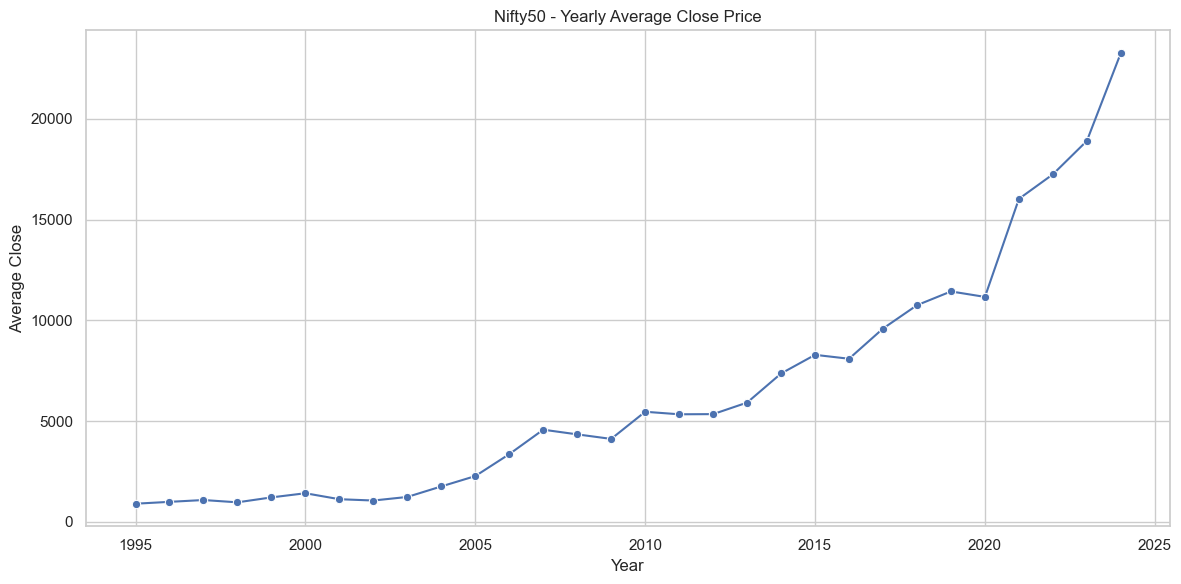

In [15]:
annual_trend = df.groupby('Year')['Close'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_trend, x='Year', y='Close', marker='o')
plt.title('Nifty50 - Yearly Average Close Price')
plt.xlabel('Year')
plt.ylabel('Average Close')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ANKIT RAJ\AppData\Local\Temp\ipykernel_14872\1744706837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_volatility, x='Year', y='Volatility', palette='coolwarm')


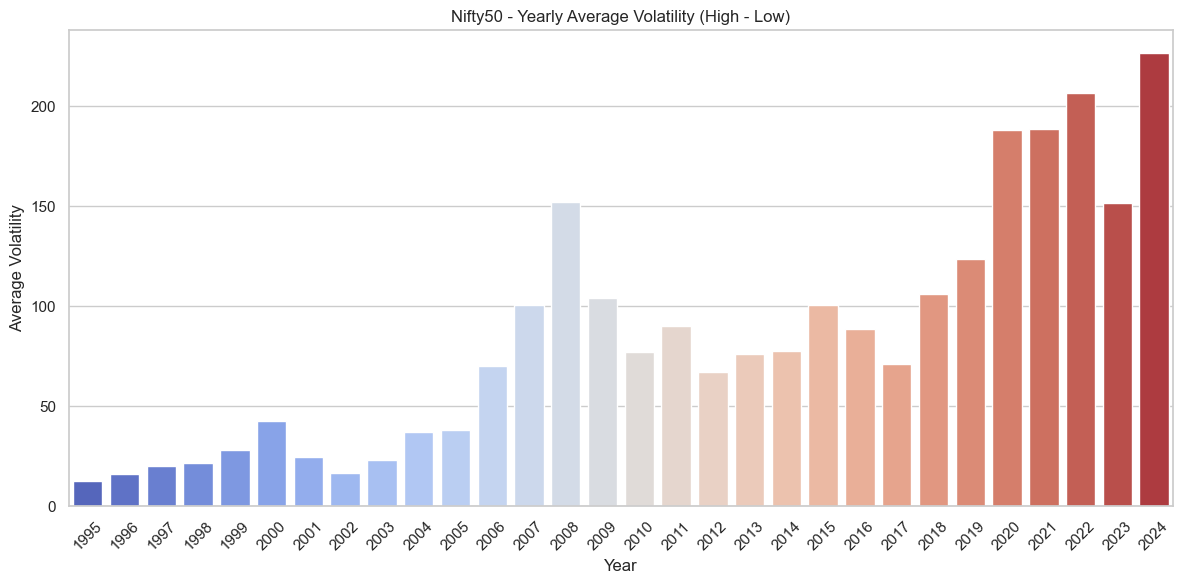

In [16]:
yearly_volatility = df.groupby('Year')['Volatility'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_volatility, x='Year', y='Volatility', palette='coolwarm')
plt.title('Nifty50 - Yearly Average Volatility (High - Low)')
plt.xlabel('Year')
plt.ylabel('Average Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


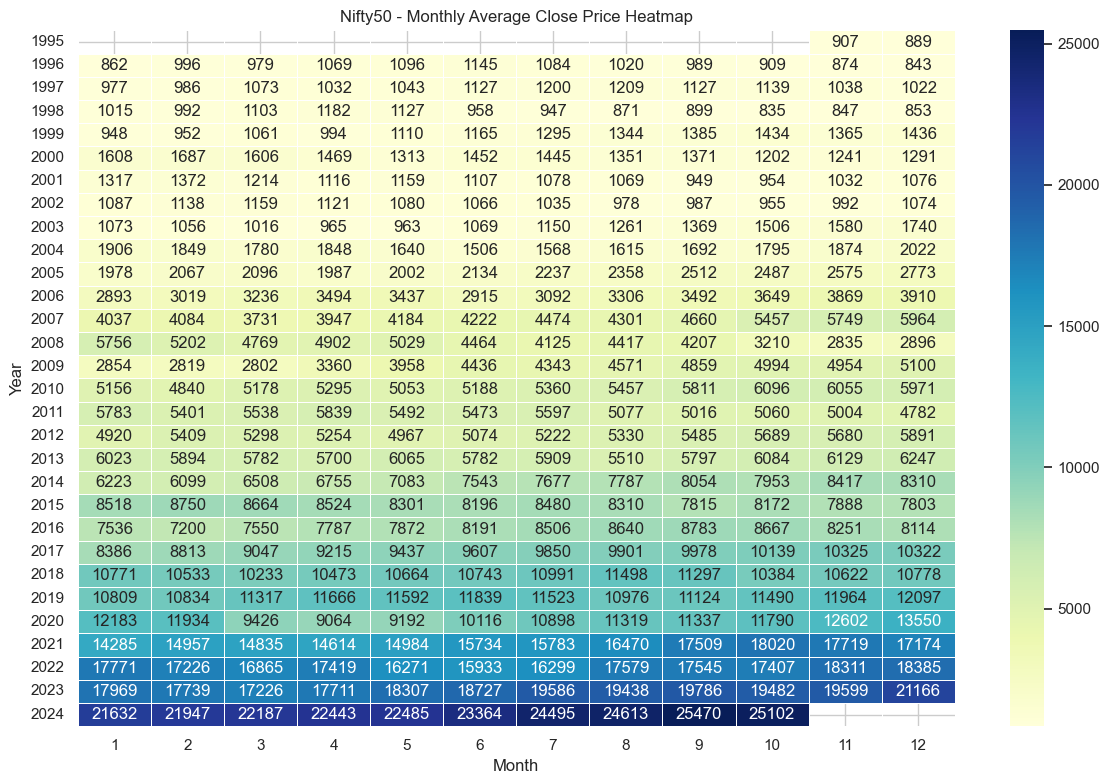

In [17]:
monthly_avg = df.groupby(['Year', 'Month'])['Close'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Nifty50 - Monthly Average Close Price Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


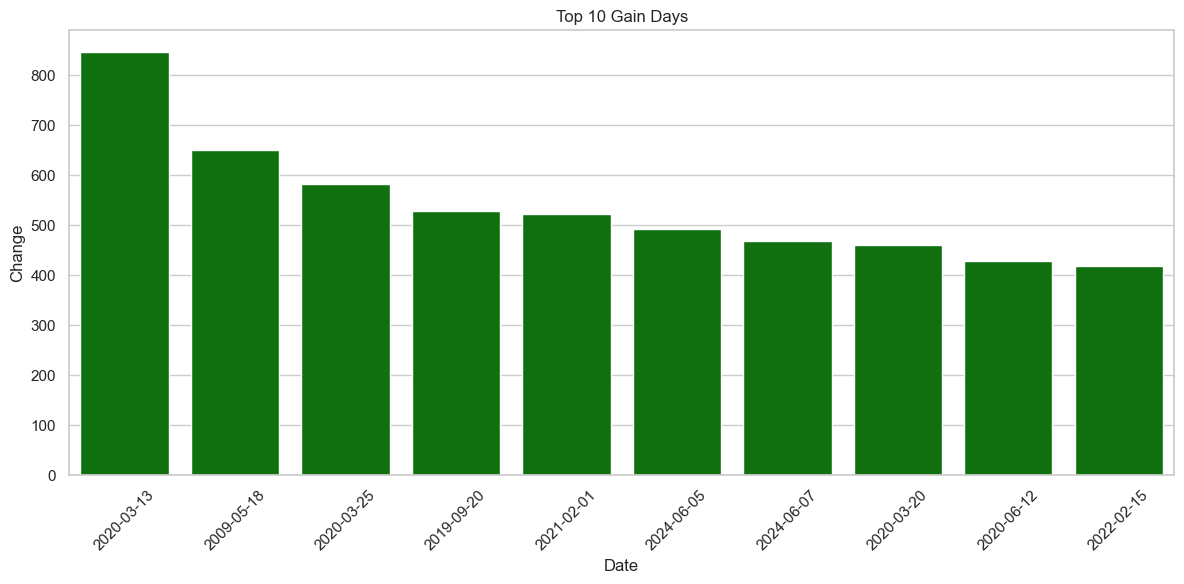

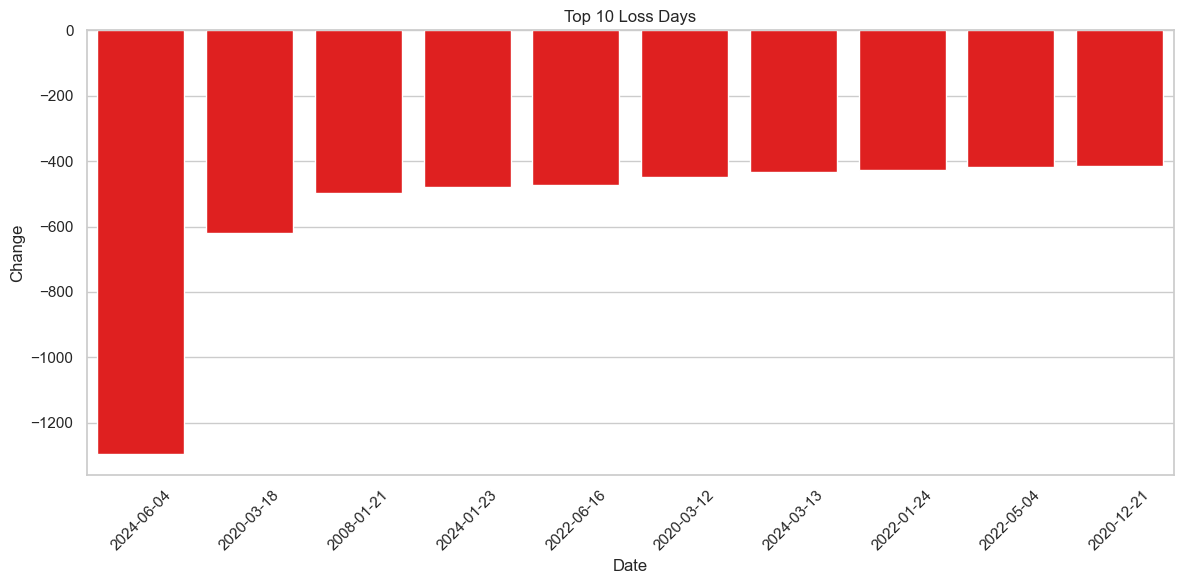

In [18]:
top_gains = df.sort_values(by='Change', ascending=False).head(10)
top_losses = df.sort_values(by='Change').head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_gains, x='Date', y='Change', color='green')
plt.title('Top 10 Gain Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_losses, x='Date', y='Change', color='red')
plt.title('Top 10 Loss Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
